In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp
%matplotlib inline

## Let's load Boston House Pricing Dataset


In [122]:
import pandas as pd
import os

# Get the absolute path to the Downloads directory
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Specify the full path to the file
file_path = os.path.join(downloads_path, "BostonHousing.csv")

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the DataFrame
dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data anlysis

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Boston Data Description 
The Boston Housing dataset contains information about various features related to housing in the Boston area. These features are used as independent variables in regression analysis to predict the median value of owner-occupied homes. Here is a list of the features in the Boston Housing dataset:

1. **CRIM:** Per capita crime rate by town.
2. **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS:** Proportion of non-retail business acres per town.
4. **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX:** Nitric oxides concentration (parts per 10 million).
6. **RM:** Average number of rooms per dwelling.
7. **AGE:** Proportion of owner-occupied units built before 1940.
8. **DIS:** Weighted distances to five Boston employment centers.
9. **RAD:** Index of accessibility to radial highways.
10. **TAX:** Full-value property tax rate per 10,000(Dollars) .
11. **PTRATIO:** Pupil-teacher ratio by town.
12. **B:** \(1000(Bk - 0.63)^2\) where \(Bk\) is the proportion of Black residents by town.
13. **LSTAT:** Percentage of lower status of the population.
14. **MEDV:** Median value of owner-occupied homes in $1000s (target variable).

These features cover a range of socio-economic and environmental factors that might influence housing prices. Researchers have used this dataset for regression analysis to study the relationships between these features and the median value of homes. Keep in mind that ethical concerns have been raised about the dataset, specifically related to the variable 'B' (which represents the proportion of Black residents) and its potentially biased interpretation. It's important to use the dataset with awareness of its limitations and potential ethical implications.

### In this data we don't have any null values.

In [176]:
#Summarizinf the stats of the data
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [177]:
#Check MISSING Values
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis

### Correlation 
-> This very very important in Regression Problem statment. If correlation is highly positively correlated then we can understand that our model been perfrom well.

-> By default when we correlate then it sets to "PEARSON COREELATION" it ranges between +1 to -1.

### There are two types of correlation
### 1) Dependent to Dependent (Multicolianirity)
-> Here we mainly need to check the Multicolianirity means check what is the correlation between dependednt features if this are very HIGH like more than 90 percent then drop any one feature from dataset this is called Multicolienarity.

### 2) Independent to Dependent
-> Here we check the that correlationof in Independent or Dependent if this are very LOW then drop those feature



In [178]:
dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


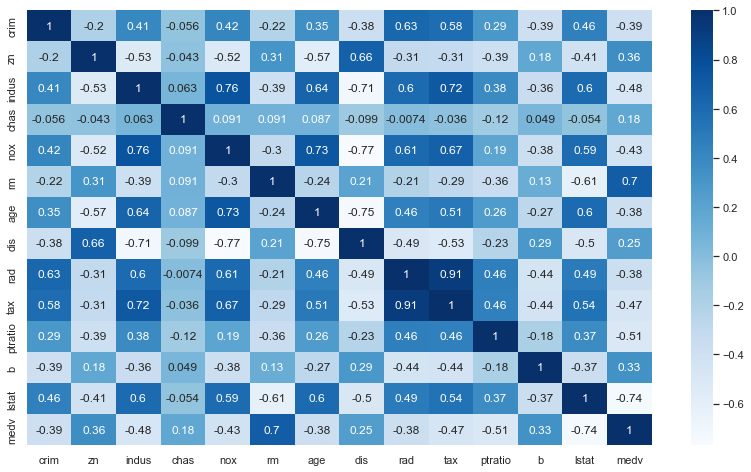

In [180]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dataset.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

In [182]:
import seaborn as sns

In [184]:
#sns.pairplot(dataset)

Text(0, 0.5, 'MEDV')

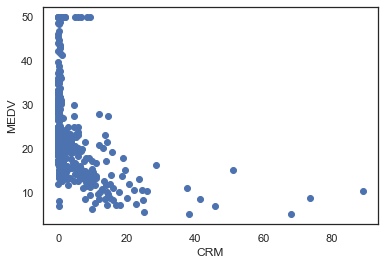

In [214]:
plt.scatter(dataset['crim'], dataset['medv'])
plt.xlabel("CRM")
plt.ylabel("MEDV")

# Observation
1.This is Negative corelation means when Crime rate in INCREASING that time Median value of owner occuspied home is DECREASING.This type of correlation is called as Negative Correlation

Text(0, 0.5, 'MEDV')

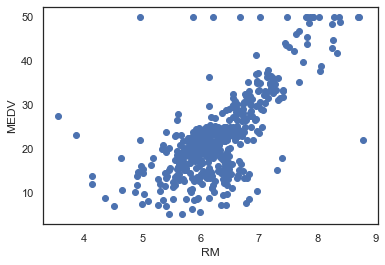

In [215]:
plt.scatter(dataset['rm'], dataset['medv'])
plt.xlabel("RM")
plt.ylabel("MEDV")

# Observations 
1.As we can see when Average number of rooms is INCREASING that time Median of owner occupied property is also INCREASING. This is called Positive Correlation


<AxesSubplot: xlabel='crim', ylabel='medv'>

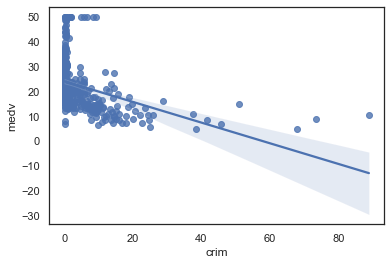

In [186]:
#Regression Plot 
import seaborn as sns
sns.regplot(x='crim', y='medv', data = dataset)

In [187]:
## Lets Divide INDEPENDENT and DEPENDENT features 

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [188]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [189]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Train Test Split 

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [191]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [192]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [193]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 354, dtype: float64

In [194]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64

## StandardScaler 
-> Internaly we used Gradient Descent and  our main is to came near global minima. And come near to global minima we have to make sure that all our independent unit should be in same scale because of that the conversions will happen quickly. for this reason we do the Normalization or Standrdization.

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [196]:
X_train = scaler.fit_transform(X_train)

In [197]:
X_test = scaler.transform(X_test)

In [198]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [199]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

# Model Training

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
regression = LinearRegression()

In [202]:
regression.fit(X_train, y_train)

LinearRegression()

In [203]:
#Print the coeficient and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [204]:
print(regression.intercept_)

23.01581920903955


In [205]:
#On which parameter model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [206]:
## Prediction with Test Data
reg_pred = regression.predict(X_test)

In [207]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

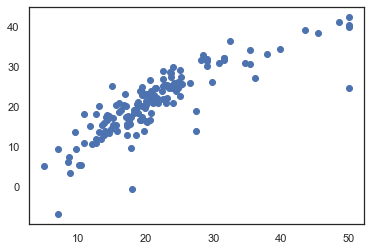

In [208]:
#plot a scatter plot for the prediction
plt.scatter( y_test,reg_pred)

<AxesSubplot: xlabel='medv'>

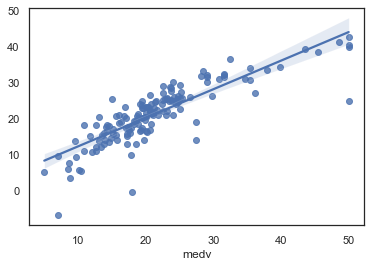

In [209]:
sns.regplot(x=y_test, y=reg_pred)

In [210]:
#Let's check the RESIDULES
residuals = y_test - reg_pred

In [211]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: medv, Length: 152, dtype: float64

# Assumption 1
-> Check it's normally distributed or not

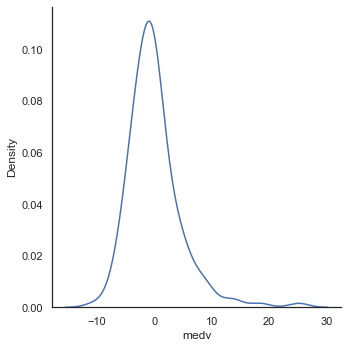

In [212]:
#Plotting this residuals
sns.displot(residuals, kind = 'kde')

## Observation
1.My Residules is ranges between -10 to +10 or some points ranges between 20 to 30 so still my model is performing well here we can say.

# Assumption 2
-> Check reg_pred and residulas are following Unifrom distribution or Not.

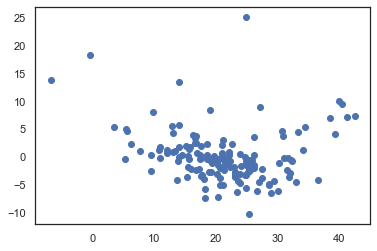

In [218]:
#Scatter plot with respect to prediction and residuals
#Uniform Distribution=  This means there is no shapefor distribution.
plt.scatter(reg_pred,residuals)

# Performance Matrix

In [225]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.1627098714574053
21.517444231177205
4.6386899261728205


# R Squre and Adjusted R Squred

**Fromula** 

**R^2 = 1 - SSR/SST**

R^2 = coeficient of determination 

SSR = Sum of squared of residulas 

SST = total sum of squres

In [226]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)

In [227]:
score

0.7112260057484934

# Adjusted R2 = 1 -[(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model

n: The number of observations 

k: The number of predictions

In [228]:
#Adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639312

# Pickling the Model file For Deployment

In [231]:
import pickle

In [234]:
pickle.dump(regression, open('regmodel.pkl', 'wb')) #with the help of this we can deploy this to everywhere.

In [235]:
# We store this on docker or in bascket to do the prediction.
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [236]:
# After this we are going to deploying this pickel file from end to end project after this we are using Visual Studio.